#brain Tumor Classification

In [1]:
# These packages may not be pre-installed in Colab
!pip install mplcyberpunk tqdm


In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

import cv2
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [3]:
data_path = '/content/drive/MyDrive/Brain tumor dataset/dataset'

for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(27).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(107).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(17).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(16).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(124).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(22).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(102).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(13).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(126).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(14).jpg
/content/drive/MyDrive/Brain tumor dataset/dataset/Testing/meningioma_tumor/image(19).jpg
/conte

In [4]:
X_train = []
y_train = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


image_size = 150
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain tumor dataset/dataset/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain tumor dataset/dataset/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:24<00:00,  3.06it/s]


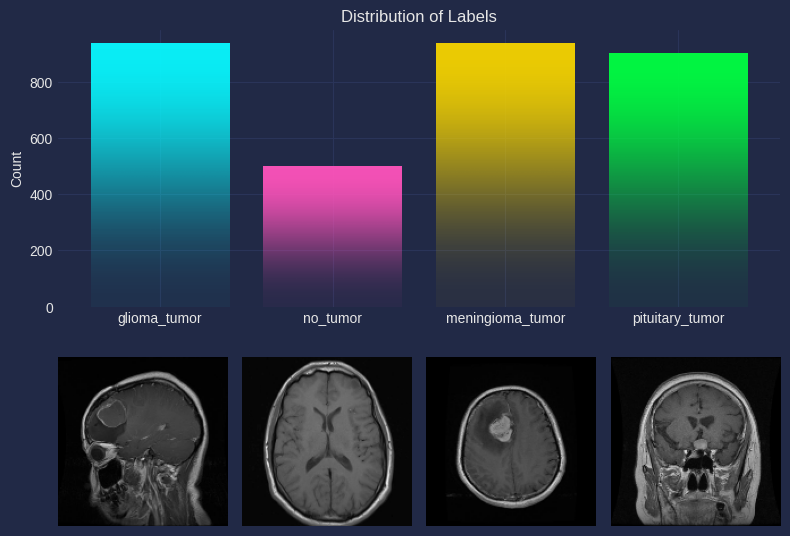

In [5]:
# Calculate the bar plot for each label
label_counts = {label: np.sum(y_train == label) for label in labels}

# Plot the bar plot and sample images in one chart
plt.figure(figsize=(8, 6))

colors = ["C0", "C1", "C2", "C3"]

# Plot the histogram
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
# plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Plot sample images from each label
k = 0
for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            plt.subplot(2, 4, k + 5)
            plt.imshow(X_train[j])
            plt.axis('off')
            k += 1
            break
        j += 1

plt.tight_layout()
plt.show()

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

One Hot Encoding labels

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
#EfficientNet

In [9]:
# Load the EfficientNetB0 model pretrained on ImageNet without the top layers
efficientnetB0 = tf.keras.applications.EfficientNetB0(weights='imagenet',
                                                      include_top=False,
                                                      input_shape=(image_size, image_size, 3))


# Build the custom model on top of the EfficientNetB0 base
model = efficientnetB0.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dense(1024,activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientnetB0.input, outputs = model)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 5,365,415 (20.47 MB)

 Trainable params: 5,323,392 (20.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [11]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model
checkpoint = ModelCheckpoint("efficientnetB0.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2,
                              min_delta=0.0001, verbose=1)
history = model.fit(X_train,y_train,validation_split = 0.1, epochs = 12, verbose = 1,
                    batch_size = 32, callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.7547 - loss: 0.6766
Epoch 1: val_accuracy improved from -inf to 0.83390, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 136s 636ms/step - accuracy: 0.7555 - loss: 0.6748 - val_accuracy: 0.8339 - val_loss: 0.5687 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9193 - loss: 0.2242
Epoch 2: val_accuracy improved from 0.83390 to 0.87797, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9194 - loss: 0.2243 - val_accuracy: 0.8780 - val_loss: 0.7765 - learning_rate: 0.0010
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9496 - loss: 0.1625
Epoch 3: val_accuracy improved from 0.87797 to 0.88814, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9497 - loss: 0.1623 - val_accuracy: 0.8881 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 67m

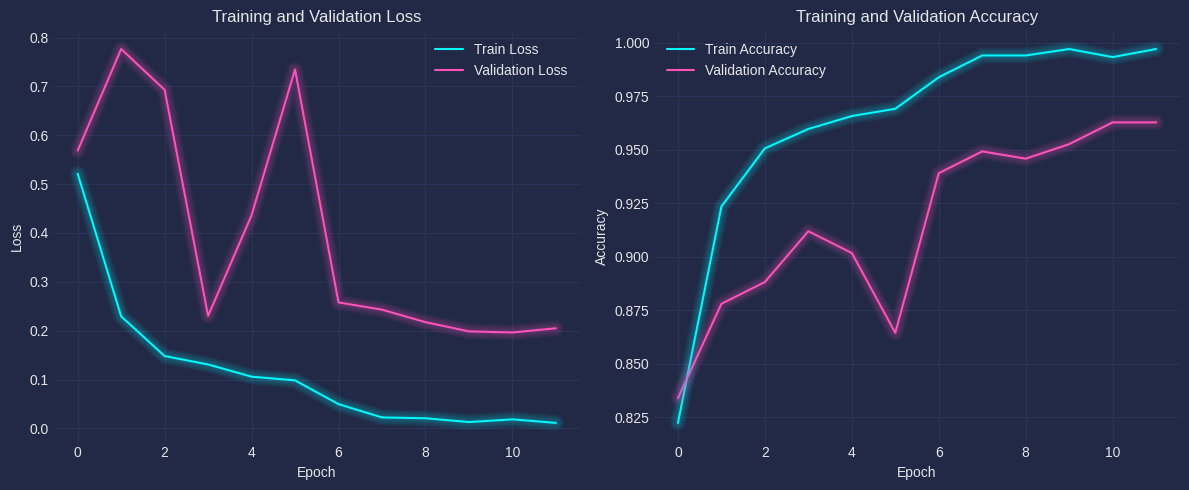

In [12]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 678ms/step


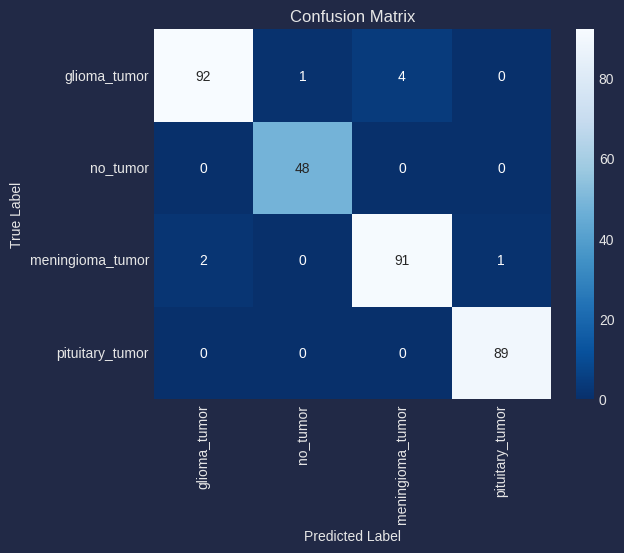

In [13]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1)

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        97
           1       0.98      1.00      0.99        48
           2       0.96      0.97      0.96        94
           3       0.99      1.00      0.99        89

    accuracy                           0.98       328
   macro avg       0.98      0.98      0.98       328
weighted avg       0.98      0.98      0.98       328



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted label: no_tumor 
Actual label: no_tumor 
Confidence: 99.99%



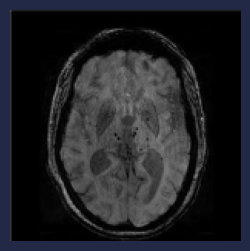

In [15]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

In [17]:
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, ResNet50, VGG16, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dictionary of backbones
base_models = {
    "EfficientNetB0": EfficientNetB0,
    "MobileNetV2": MobileNetV2,
    "ResNet50": ResNet50,
    "VGG16": VGG16,
    "InceptionV3": InceptionV3
}

results = {}

# Loop over all models
for name, base_model_fn in base_models.items():
    print(f"\n🏗️ Training model: {name}")
    try:
        base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
        base_model.trainable = False

        x = GlobalAveragePooling2D()(base_model.output)
        x = Dense(1024, activation='relu')(x)
        x = Dropout(0.4)(x)
        output = Dense(len(labels), activation='softmax')(x)
        model = Model(inputs=base_model.input, outputs=output)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_split=0.1, epochs=12, batch_size=32, verbose=1)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        report = classification_report(y_true, y_pred, output_dict=True)
        cm = confusion_matrix(y_true, y_pred)

        results[name] = {
            "Test Accuracy": accuracy,
            "Classification Report": report,
            "Confusion Matrix": cm
        }

        print(f"✅ {name} accuracy: {accuracy:.4f}")
    except Exception as e:
        results[name] = {"Error": str(e)}
        print(f"❌ Error in {name}: {e}")

# Display comparison
print("\n📊 Accuracy Comparison:")
for model_name, result in results.items():
    acc = result.get("Test Accuracy", "Error")
    print(f"{model_name}: {acc}")



🏗️ Training model: EfficientNetB0
Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.6285 - loss: 0.8799 - val_accuracy: 0.8068 - val_loss: 0.5152
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8303 - loss: 0.4530 - val_accuracy: 0.8678 - val_loss: 0.3753
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8621 - loss: 0.3477 - val_accuracy: 0.8508 - val_loss: 0.3627
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8962 - loss: 0.2794 - val_accuracy: 0.8610 - val_loss: 0.3364
Epoch 5/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9039 - loss: 0.2525 - val_accuracy: 0.8847 - val_loss: 0.2752
Epoch 6/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9149 - loss: 0.2235 - val_accuracy: 0.9051 - val_loss: 0.2798
Epoch 7/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9240 - loss: 0.1960 - val_accuracy: 0.9051 - val_loss: 0.2801
Epoch 8/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9355 - lo

<ipython-input-17-605dee601f86>:24: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))


Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.5121 - loss: 1.5723 - val_accuracy: 0.7119 - val_loss: 0.6957
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7617 - loss: 0.6051 - val_accuracy: 0.7322 - val_loss: 0.6241
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7796 - loss: 0.5400 - val_accuracy: 0.7932 - val_loss: 0.5334
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8209 - loss: 0.4778 - val_accuracy: 0.8102 - val_loss: 0.4783
Epoch 5/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8481 - loss: 0.3826 - val_accuracy: 0.8136 - val_loss: 0.4630
Epoch 6/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8430 - loss: 0.4054 - val_accuracy: 0.7831 - val_loss: 0.5118
Epoch 7/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8526 - loss: 0.3815 - val_accuracy: 0.8339 - val_loss: 0.4322
Epoch 8/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8582 - loss: 0.3611 - val_accuracy: 0.8305 